<a href="https://colab.research.google.com/github/pedro-delima/projetos-ai/blob/main/Another_copy_of_Projeto%2Binicial%2B_%2BClassifica%C3%A7%C3%A3o%2B_%2BValida%C3%A7%C3%A3o%2Be%2Bm%C3%A9tricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='dark'>**Classificação: Validação de modelos e métricas de avaliação**</h1>

### Projeto

Uma empresa de empréstimo de automóveis está passando por uma situação complicada, com alta demanda para uma frota reduzida de veículos e alto número de inadimplentes, trazendo um prejuízo grande para a empresa.

Nós fomos contratados para buscar melhorias na identificação de inadimplentes. A análise dos clientes atualmente é feita de forma manual, cliente por cliente, tomando muito tempo e ainda assim a detecção de inadimplentes é muito imprecisa.

Nossa tarefa é utilizar os dados fornecidos pela empresa para **classificar** os clientes em adimplentes e inadimplentes.

## <font color='dark'>Classificando dados</h1>

### Criando um modelo inicial

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('/content/emp_automovel.csv')

In [ ]:
dados

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


In [ ]:
x = dados.drop('inadimplente', axis=1)
y = dados['inadimplente']

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
modelo = DecisionTreeClassifier()
modelo.fit(x, y)
modelo.score(x, y)

1.0

In [ ]:
print(f'Acurácia: {modelo.score(x, y)}')

Acurácia: 1.0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x, x_teste, y, y_teste = train_test_split(x, y, test_size = 0.15, stratify = y, random_state = 5)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify = y, random_state = 5)

In [ ]:
modelo = DecisionTreeClassifier()
modelo.fit(x_treino, y_treino)
print(f'Acuracia Treino {modelo.score(x_treino, y_treino)}')
print(f'Acuracia de Validação {modelo.score(x_val, y_val)}')

Acuracia Treino 1.0
Acuracia de Validação 0.8490549603693058


In [ ]:
modelo = DecisionTreeClassifier(max_depth= 10)
modelo.fit(x_treino, y_treino)
print(f'Acuracia Treino {modelo.score(x_treino, y_treino)}')
print(f'Acuracia de Validação {modelo.score(x_val, y_val)}')

Acuracia Treino 0.9206445993031359
Acuracia de Validação 0.9056702377841651


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_previsto = modelo.predict(x_val)
matriz_confusao = confusion_matrix(y_val, y_previsto)
print(matriz_confusao)

[[10357   122]
 [  961    41]]


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

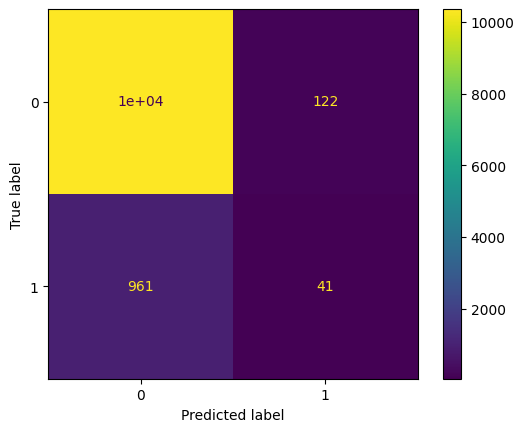

In [ ]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix= matriz_confusao)
visualizacao.plot();

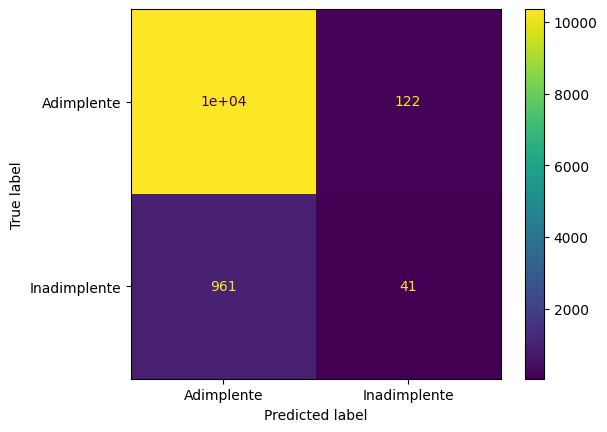

In [ ]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix= matriz_confusao, display_labels=['Adimplente', 'Inadimplente'])
visualizacao.plot();

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(f'Acuracia: {accuracy_score(y_val, y_previsto)}')

Acuracia: 0.9056702377841651


In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
print(f'Previsão: {precision_score(y_val, y_previsto)}')

Previsão: 0.25153374233128833


In [ ]:
print(f'Recall: {recall_score(y_val, y_previsto)}')

Recall: 0.04091816367265469


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
print(f'F1-Score: {f1_score(y_val, y_previsto)}')

F1-Score: 0.0703862660944206


In [ ]:
from sklearn.metrics import RocCurveDisplay

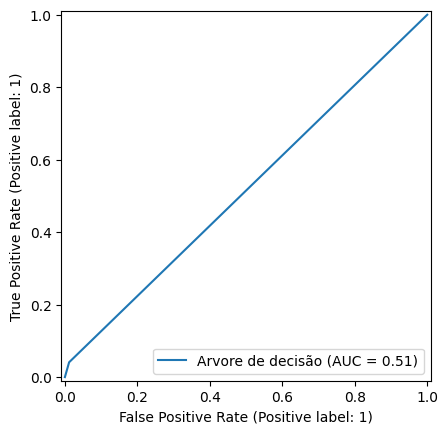

In [ ]:
RocCurveDisplay.from_predictions(y_val, y_previsto, name = 'Arvore de decisão');

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
print(f'AUC: {roc_auc_score(y_val, y_previsto)}')

AUC: 0.51463791569452


In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

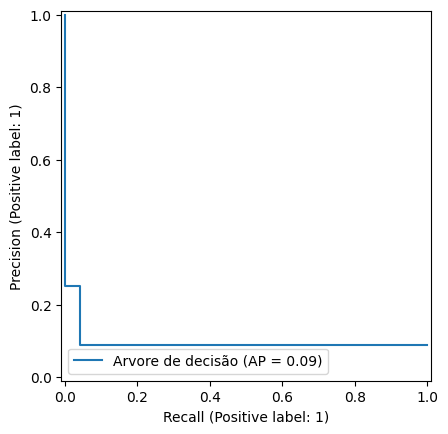

In [ ]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name = 'Arvore de decisão');

In [ ]:
from sklearn.metrics import average_precision_score

In [ ]:
print(f'AP: {average_precision_score(y_val, y_previsto)}')

AP: 0.09399580898510673


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_val, y_previsto))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.25      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.58      0.51      0.51     11481
weighted avg       0.86      0.91      0.87     11481

